## 1. Introduction to Baby Names Data
<blockquote>
  <p>What’s in a name? That which we call a rose, By any other name would smell as sweet.</p>
</blockquote>
<p>In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing. </p>
<p>Let us start by reading the data.</p>

In [1]:
# Import modules
import pandas as pd

# Read names into a dataframe: bnames
bnames = pd.read_csv('datasets/names.csv.gz')
print(bnames.head())

        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880


## 2. Exploring Trends in Names
<p>One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later). Do you want to make any guesses? Go on, be a sport!!</p>

In [2]:
# get the all the names in the last decade
bnames_2010 = bnames.loc[bnames['year'] > 2010]
# sum up all of the people based on name and sex
bnames_2010_agg = bnames_2010.groupby(['sex', 'name'],as_index = False)['births'].sum()
#sort all the names based on births with female first then get the top 5 of each and remove
# the indexing
bnames_top5 = bnames_2010_agg.sort_values(['sex', 'births'],ascending=[True, False]).\
    groupby('sex').head().reset_index(drop=True)
print(bnames_top5)

  sex      name  births
0   F      Emma  121375
1   F    Sophia  117352
2   F    Olivia  111691
3   F  Isabella  103947
4   F       Ava   94507
5   M      Noah  110280
6   M     Mason  105104
7   M     Jacob  104722
8   M      Liam  103250
9   M   William   99144


## 3. Proportion of Births
<p>While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.</p>

In [3]:
bnames2 = bnames.copy()
# Compute the proportion of births by year and add it as a new column
total_births_by_year = bnames2.groupby('year')['births'].transform(sum)
bnames2['prop_births'] = bnames2['births']/total_births_by_year
print(bnames2.head())

        name sex  births  year  prop_births
0       Mary   F    7065  1880     0.035065
1       Anna   F    2604  1880     0.012924
2       Emma   F    2003  1880     0.009941
3  Elizabeth   F    1939  1880     0.009624
4     Minnie   F    1746  1880     0.008666


## 4. Popularity of Names
<p>Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the  names <code>Alex</code>, and <code>Emilia</code>, and inspecting the underlying trends for any interesting patterns!</p>

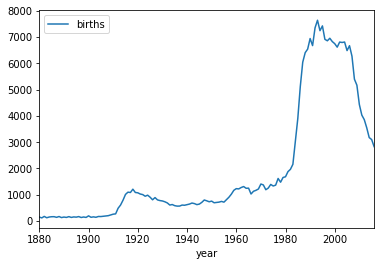

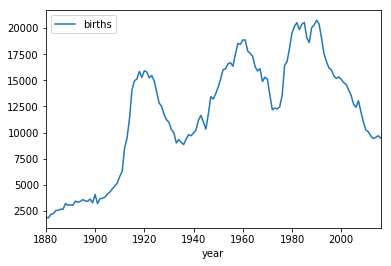

In [13]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trends(name, sex):
  # -- YOUR CODE HERE --
    data = bnames[(bnames.name == name) & (bnames.sex == sex)]
    ax = data.plot(x='year',y='births')
    ax.set_xlim(1880,2016)
    return ax


# -- YOUR CODE HERE --
plot_trends('Alex','M')
plot_trends('Elizabeth','F')

## 5. Trendy vs. Stable Names
<p>Based on the plots we created earlier, we can see that <strong>Elizabeth</strong> is a fairly stable name, while <strong>Alex</strong> is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down. </p>
<p>There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name <code>Joe</code> had the proportions <code>0.1, 0.2, 0.1, 0.1</code>, then the trendiness measure would be <code>0.2/(0.1 + 0.2 + 0.1 + 0.1)</code> which equals <code>0.5</code>.</p>
<p>Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.</p>

In [5]:
# top10_trendy_names | A Data Frame of the top 10 most trendy names
names = pd.DataFrame()
name_and_sex= bnames.groupby(['name', 'sex'])
names['total'] = name_and_sex['births'].sum()
names['max'] = name_and_sex['births'].max()
names['trendiness'] = names['max']/names['total']
top10_trendy_names = names.loc[names['total'] >= 1000].sort_values('trendiness', ascending=False).head(10).reset_index()

print(top10_trendy_names)

       name sex  total   max  trendiness
0  Christop   M   1082  1082    1.000000
1   Royalty   F   1057   581    0.549669
2     Kizzy   F   2325  1116    0.480000
3    Aitana   F   1203   564    0.468828
4    Deneen   F   3602  1604    0.445308
5    Moesha   F   1067   426    0.399250
6    Marely   F   2527  1004    0.397309
7     Kanye   M   1304   507    0.388804
8  Tennille   F   2172   769    0.354052
9   Kadijah   F   1411   486    0.344437


## 6. Bring in Mortality Data
<p>So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name (Whoa! Really????). For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the <a href="https://www.ssa.gov/">SSA</a> provides detailed <a href="https://www.ssa.gov/oact/STATS/table4c6.html">actuarial life tables</a> by birth cohorts.</p>
<table>
<thead>
<tr>
<th style="text-align:right;">year</th>
<th style="text-align:right;">age</th>
<th style="text-align:right;">qx</th>
<th style="text-align:right;">lx</th>
<th style="text-align:right;">dx</th>
<th style="text-align:right;">Lx</th>
<th style="text-align:right;">Tx</th>
<th style="text-align:right;">ex</th>
<th style="text-align:left;">sex</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">39</td>
<td style="text-align:right;">0.00283</td>
<td style="text-align:right;">78275</td>
<td style="text-align:right;">222</td>
<td style="text-align:right;">78164</td>
<td style="text-align:right;">3129636</td>
<td style="text-align:right;">39.98</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">40</td>
<td style="text-align:right;">0.00297</td>
<td style="text-align:right;">78053</td>
<td style="text-align:right;">232</td>
<td style="text-align:right;">77937</td>
<td style="text-align:right;">3051472</td>
<td style="text-align:right;">39.09</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">41</td>
<td style="text-align:right;">0.00318</td>
<td style="text-align:right;">77821</td>
<td style="text-align:right;">248</td>
<td style="text-align:right;">77697</td>
<td style="text-align:right;">2973535</td>
<td style="text-align:right;">38.21</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">42</td>
<td style="text-align:right;">0.00332</td>
<td style="text-align:right;">77573</td>
<td style="text-align:right;">257</td>
<td style="text-align:right;">77444</td>
<td style="text-align:right;">2895838</td>
<td style="text-align:right;">37.33</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">43</td>
<td style="text-align:right;">0.00346</td>
<td style="text-align:right;">77316</td>
<td style="text-align:right;">268</td>
<td style="text-align:right;">77182</td>
<td style="text-align:right;">2818394</td>
<td style="text-align:right;">36.45</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">44</td>
<td style="text-align:right;">0.00351</td>
<td style="text-align:right;">77048</td>
<td style="text-align:right;">270</td>
<td style="text-align:right;">76913</td>
<td style="text-align:right;">2741212</td>
<td style="text-align:right;">35.58</td>
<td style="text-align:left;">F</td>
</tr>
</tbody>
</table>
<p>You can read the <a href="https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html">documentation for the lifetables</a> to understand what the different columns mean. The key column of interest to us is <code>lx</code>, which provides the number of people born in a <code>year</code> who live upto a given <code>age</code>. The probability of being alive can be derived as <code>lx</code> by 100,000. </p>
<p>Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, "What percentage of people born in Year X are still alive in 2016?" </p>
<p>Let us use this data and plot it to get a sense of the mortality distribution!</p>

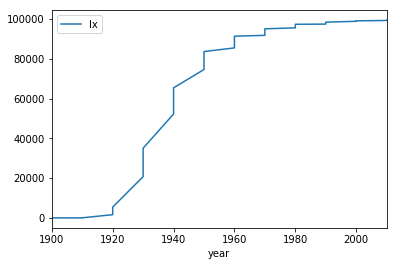

In [6]:
# Read lifetables from datasets/lifetables.csv
lifetables= pd.read_csv('datasets/lifetables.csv')

# Extract subset relevant to those alive in 2016
lifetables_2016 = lifetables[lifetables['age'] + lifetables['year'] == 2016]

# Plot the mortality distribution: year vs. lx
lifetables_2016.plot(x='year',y='lx')


## 7. Smoothen the Curve!
<p>We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of <code>lx</code>, between the years <code>1900</code> and <code>2016</code>.</p>

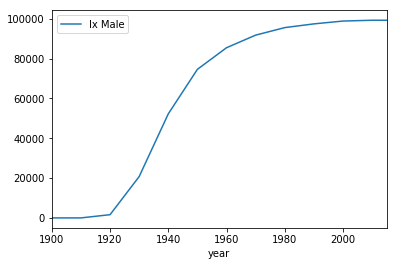

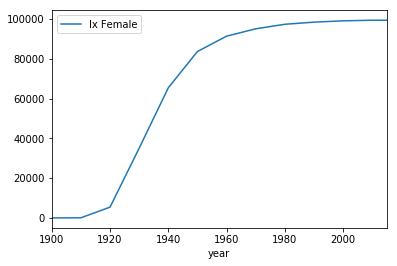

In [7]:
# Create smoothened lifetable_2016_s by interpolating values of lx
import numpy as np
year = np.arange(1900, 2016)
male_and_female = {"M": pd.DataFrame(), "F": pd.DataFrame()}
for sex in ["M", "F"]:
  d = lifetables_2016[lifetables_2016['sex']==sex][["year", "lx"]]
  male_and_female[sex] = d.set_index('year').reindex(year).interpolate().reset_index()
  male_and_female[sex]['sex'] = sex

lifetable_2016_s = pd.concat(male_and_female, ignore_index = True)
lifetable_2016_s[(lifetable_2016_s.sex=="M")].plot(x='year',y='lx',label='lx Male')
lifetable_2016_s[(lifetable_2016_s.sex=="F")].plot(x='year',y='lx',label='lx Female')


## 8. Distribution of People Alive by Name
<p>Now that we have all the required data, we need a few helper functions to help us with our analysis. </p>
<p>The first function we will write is <code>get_data</code>,which takes <code>name</code> and <code>sex</code> as inputs and returns a data frame with the distribution of number of births and number of people alive by year.</p>
<p>The second function is <code>plot_name</code> which accepts the same arguments as <code>get_data</code>, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.</p>
<p>The third function is <code>plot_range</code> which accepts the same arguments as <code>plot_data</code> and it also needs two integers. This allows you to simply focus more on a specific time that you would like to see information about your name.</p>
<p>Using these functions, we will plot the distribution of births for boys named <strong>Alex</strong> and girls named <strong>Michele</strong>.</p>

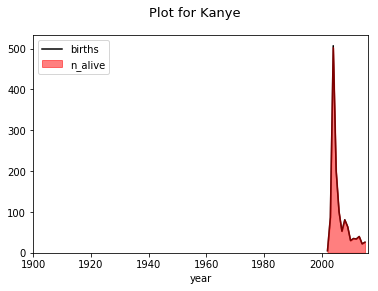

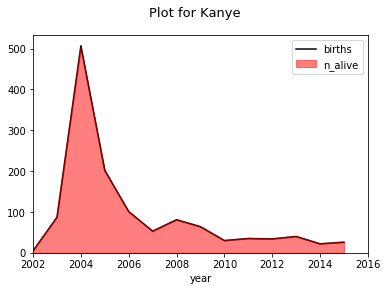

In [19]:
def get_data(name, sex):
    name_sex = ((bnames['name'] == name) & (bnames['sex'] == sex))
    data = bnames[name_sex].merge(lifetable_2016_s)
    data['n_alive'] = data['lx']/(10**5)*data['births']
    return data
    

def plot_data(name, sex):
    fig, ax = plt.subplots()
    dat = get_data(name, sex)
    dat.plot(x = 'year' , y = 'births', ax = ax, 
               color = 'black')
    dat.plot(x = 'year', y = 'n_alive', 
              kind = 'area', ax = ax, 
              color = 'red', alpha = 0.5)
    ax.set_xlim(1900, 2016)
    fig.suptitle('Plot for '+name, fontsize=13)
    return ax
    
def plot_range(name, sex,start,end):
    fig, ax = plt.subplots()
    dat = get_data(name, sex)
    dat.plot(x = 'year' , y = 'births', ax = ax, 
               color = 'black')
    dat.plot(x = 'year', y = 'n_alive', 
              kind = 'area', ax = ax, 
              color = 'red', alpha = 0.5)
    ax.set_xlim(start, end)
    fig.suptitle('Plot for '+name, fontsize=13)
    return ax
# Plot the distribution of births and number alive for Joseph and Brittany
plot_data('Kanye', 'M')
plot_range('Kanye', 'M',2002,2016)

## 9. Estimate Age
<p>In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named <strong>Gertrude</strong>. Any guesses on how old a person with this name is? How about a male named <strong>Alex</strong>?</p>

In [9]:
# Import modules
from wquantiles import quantile

# Function to estimate age quantiles
def estimate_age(name, sex):
    data = get_data(name, sex)
    qs = [0.75, 0.5, 0.25]
    quantiles = [2018 - int(quantile(data.year, data.n_alive, q)) for q in qs]
    result = dict(zip(['q25', 'q50', 'q75'], quantiles))
    result['p_alive'] = round(data.n_alive.sum()/data.births.sum()*100, 2)
    result['sex'] = sex
    result['name'] = name
    return pd.Series(result)


# Estimate the age of Gertrude
print(estimate_age('Gertrude','F'))
print(estimate_age('Alex','M'))

name       Gertrude
p_alive       18.73
q25              72
q50              82
q75              91
sex               F
dtype: object
name        Alex
p_alive    87.82
q25           15
q50           23
q75           32
sex            M
dtype: object


## 10. Median Age of Top 10 Female and Males Names
<p>In the previous section, we estimated the age of a female named Emilia and a male named Alex. Let's go one step further this time, and compute the 25th, 50th and 75th percentiles of age, and the probability of being alive for the top 10 most common female and male names of all time. This should give us some interesting insights on how these names stack up in terms of median ages!</p>

In [10]:
# Create median_ages: DataFrame with Top 10 Female names, 
#    age percentiles and probability of being alive

def get_median_age(sex):
    error= 'There are only two genders: try M or F'
    if sex == 'M':
        s_query = 'sex == "M"'
    elif sex =='F':
        s_query = 'sex == "F"'
    else :
        return error
    
    top_10_names = bnames.groupby(['name', 'sex'], as_index = False).agg({'births': np.sum}).\
    sort_values('births', ascending = False).query(s_query).head(10).reset_index(drop = True)
    estimates = pd.concat([estimate_age(name, sex) for name in top_10_names.name], axis = 1)
    median_ages = estimates.T.sort_values('q50', ascending = False).reset_index(drop = True)
    return median_ages
print(get_median_age('M'))
print(get_median_age('F'))


      name p_alive q25 q50 q75 sex
0  Richard   66.66  46  60  70   M
1  Charles   59.36  39  58  70   M
2   Robert   63.31  42  57  69   M
3    James   65.15  39  56  68   M
4     John    62.7  39  56  67   M
5   Thomas    70.7  35  55  66   M
6  William   61.32  33  54  68   M
7    David   80.95  35  52  62   M
8  Michael   86.79  31  46  59   M
9   Joseph   69.77  26  42  60   M
        name p_alive q25 q50 q75 sex
0    Dorothy   35.81  66  77  87   F
1    Barbara   70.61  60  68  76   F
2       Mary   54.41  55  66  76   F
3      Linda   83.43  59  66  71   F
4   Margaret   49.47  53  66  77   F
5   Patricia   76.75  56  65  73   F
6      Susan    85.8  54  61  67   F
7  Elizabeth   74.49  25  40  60   F
8   Jennifer   96.35  33  40  46   F
9      Sarah   86.05  22  32  40   F


## 11. Find other information
<p>
Would you like to know when your name was popular? Use the <code>get_max_year</code> function to get the information about the year in which your name was the most popular.</p>
<p>
How many <strong>Alex</strong> were there born in 1998? Use the <code>get_year_info</code> function to find out.
</p>
<p>Do you wanna find out specific information about your name in a certain period of time? Use the  <code>get_total_births_range</code> function to fund out</p> 

In [18]:
def get_max_year(name, sex):
    data = bnames[(bnames.name == name) & (bnames.sex == sex)]
    sort = data.sort_values( by = 'births', ascending=False)
    year = sort.iloc[0]['year']
    births = sort.iloc[0]['births']
    result = name + ' was the most popular name in '+  str(year)+' with '+ str(births)+' births'
    return result
print(get_max_year('Alexander','M'))

def get_year_info(name,year):
    data = bnames[(bnames.name == name) & (bnames.year == year)].reset_index(drop=True)
    size= data.shape[0]
    if (size == 1):
        if(data.loc[0]['sex'] == 'M'):
            output = 'There were '+ str(data.iloc[0]['births']) + ' males born in '+str(data.iloc[0]['year'])
        else:
            output = 'There were '+ str(data.iloc[0]['births']) + ' females born in '+str(data.iloc[0]['year'])
    else:
        females = 'There were '+ str(data.iloc[0]['births']) + ' females born in '+str(data.iloc[0]['year'])+' named '+ name
        males   = 'There were '+ str(data.iloc[1]['births']) + ' males born in '  +str(data.iloc[1]['year'])+' named ' + name
        output= females + ' \n' +males
    return output 
print(get_year_info('Alex',1998))

def get_total_births_range(name, sex, start, end):
    output=''
    data = bnames[(bnames.name == name) & (bnames.year > start-1)& (bnames.year < end+1) &(bnames.sex == sex)].reset_index(drop=True)
    for i in range(0,data.shape[0]):
        output+= 'There were '+ str(data.loc[i]['births'])+' '+ name+' born in the year ' +str(data.iloc[i]['year'])+ '\n'
    return output
print(get_total_births_range('Kanye', "M", 2000, 2016))

Alexander was the most popular name in 1993 with 20522 births
There were 279 females born in 1998 named Alex 
There were 6951 males born in 1998 named Alex
There were 5 Kanye born in the year 2002
There were 87 Kanye born in the year 2003
There were 507 Kanye born in the year 2004
There were 202 Kanye born in the year 2005
There were 101 Kanye born in the year 2006
There were 53 Kanye born in the year 2007
There were 81 Kanye born in the year 2008
There were 64 Kanye born in the year 2009
There were 30 Kanye born in the year 2010
There were 35 Kanye born in the year 2011
There were 34 Kanye born in the year 2012
There were 40 Kanye born in the year 2013
There were 22 Kanye born in the year 2014
There were 26 Kanye born in the year 2015
There were 17 Kanye born in the year 2016



Kanye was the most popular name in 2004 with 507 births
There were 5 Kanye born in the year 2002
There were 87 Kanye born in the year 2003
There were 507 Kanye born in the year 2004
There were 202 Kanye born in the year 2005
There were 101 Kanye born in the year 2006
There were 53 Kanye born in the year 2007
There were 81 Kanye born in the year 2008
There were 64 Kanye born in the year 2009
There were 30 Kanye born in the year 2010
There were 35 Kanye born in the year 2011
There were 34 Kanye born in the year 2012
There were 40 Kanye born in the year 2013
There were 22 Kanye born in the year 2014
There were 26 Kanye born in the year 2015
There were 17 Kanye born in the year 2016



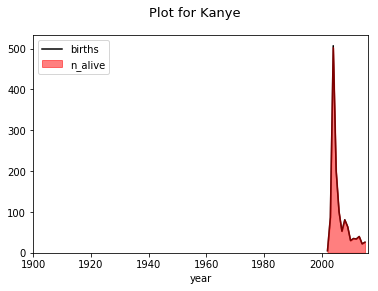

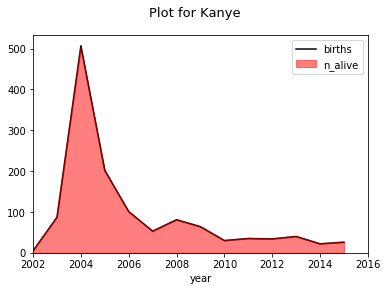

In [24]:
print(get_max_year('Kanye','M'))
plot_data('Kanye', 'M')
plot_range('Kanye', 'M',2002,2016)
print(get_total_births_range('Kanye', "M", 2000, 2016))